In [1]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
file_path = r"C:\\Users\\hayle\\Downloads\\DOB_Safety_Violations_20240108.csv"

In [6]:
df = pd.read_csv(file_path)

The goal of this presentation is to figure out what are the most common violations across all boroughs. 

Analyzing this data will help DOB officials understand what violations are being committed the most and hopefully encourage them to create more effective strategies/policies to deal with the problem and increase the safety of NYC tenants.


In [54]:
df.head(70)

,Violation Issue Date,Violation Number,Violation Type,Violation Remarks,Violation Status,Borough,Zip
0,2016-06-01,060116EJVCAT500419,E,NaN,Active,MANHATTAN,11426
1,2017-10-03,100317EACJ100203,E,NaN,Active,MANHATTAN,11426
2,2021-12-17,121721EEVCAT500708,E,NaN,Active,MANHATTAN,11201
3,2023-06-20,062023LBLVIO40932,LBLVIO,VIOLATION ISSUED-FAILURE TO FILE 2019 EXTERNAL...,Active,BROOKLYN,11226
4,2023-04-25,042523LBLVIO14451,LBLVIO,VIOLATION ISSUED - FAILURE TO FILE 2022 EXTERN...,Active,BROOKLYN,11232
...,...,...,...,...,...,...,...
65,2017-01-03,010317ACC108983,ACC1,NaN,Active,MANHATTAN,10065
66,2015-06-10,061015EVCAT103799,EVCAT1,NaN,Active,BROOKLYN,11238
67,2023-08-11,VIO-FTF-VT-CAT1-202112-0004428,FTF-VT-CAT1-HA,Violation Issued-Failure To File 2021 Cat1 Tes...,Dismissed,MANHATTAN,10027
68,1997-01-13,011397LL108103631,LL1081,NaN,Active,QUEENS,11104


Trying to see how many rows there are

In [8]:
df.shape

(490978, 17)

In [10]:
print("All columns in the dataset:")
print(df.columns)

All columns in the dataset:
Index(['BIN', 'Violation Issue Date', 'Violation Number', 'Violation Type',
       'Violation Remarks', 'Violation Status', 'Device Number', 'Device Type',
       'Cycle End Date', 'Borough', 'Block', 'Lot', 'House Number', 'Street',
       'City', 'State', 'Zip'],
      dtype='object')


In [11]:
drop_cols = ['BIN','Device Number', 'Device Type',
       'Cycle End Date', 'Block', 'Lot', 'House Number', 'Street',
       'City', 'State']

df.drop(drop_cols, inplace = True, axis=1)

In [13]:
df.head(100)

,Violation Issue Date,Violation Number,Violation Type,Violation Remarks,Violation Status,Borough,Zip
0,06/01/2016,060116EJVCAT500419,E,NaN,Active,MANHATTAN,11426
1,10/03/2017,100317EACJ100203,E,NaN,Active,MANHATTAN,11426
2,12/17/2021,121721EEVCAT500708,E,NaN,Active,MANHATTAN,11201
3,06/20/2023,062023LBLVIO40932,LBLVIO,VIOLATION ISSUED-FAILURE TO FILE 2019 EXTERNAL...,Active,BROOKLYN,11226
4,04/25/2023,042523LBLVIO14451,LBLVIO,VIOLATION ISSUED - FAILURE TO FILE 2022 EXTERN...,Active,BROOKLYN,11232
...,...,...,...,...,...,...,...
95,06/20/2023,062023LBLVIO42169,LBLVIO,VIOLATION ISSUED-FAILURE TO FILE 2019 EXTERNAL...,Active,QUEENS,11355
96,10/23/2023,VIO-FTC-VT-CAT1-201812-0009010,FTC-VT-CAT1-NJ,Violation Issued-Failure To File 2018 Cat1 Tes...,Active,BROOKLYN,11238
97,11/08/2019,110819LBLVIO10321,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,BROOKLYN,11222
98,09/06/2019,090619ACC102660,ACC1,NaN,Active,MANHATTAN,10022


In [14]:
unique_values = df['Violation Type'].unique()
print(unique_values)

['E' 'LBLVIO' 'FTF-VT-CAT1-CO' 'FTC-VT-CAT1-CO' 'LL6291' 'LL1081' 'EVCAT1'
 'ACC1' 'FTF-VT-CAT1-NJ' 'FTF-VT-PER-CO' 'HBLVIO' 'FTF-VT-CAT1-HA'
 'EVCAT5' 'FTC-VT-CAT1-NJ' 'FTC-VT-PER-CO' 'JVIOS' 'JVCAT5'
 'FTC-VT-CAT1-HA' 'ACJ1' 'VCAT1' 'FTC-VT-PER-HA' 'FTF-VT-PER-HA' 'HVCAT5'
 'B' 'EJVIOS' 'LL10/81' 'EACJ1' 'FTC-BE-EXT-LP' 'FTC-BE-INT-HP'
 'FTC-BE-EXT-HP']


I am trying to figure out how far back the years go in this Data Set .Using pd.to_datetime function so I can sort the issue dates for only 2020-2023.

In [30]:
df['Violation Issue Date'] = pd.to_datetime(df['Violation Issue Date'], errors='coerce')

df_sorted = df.sort_values(by='Violation Issue Date', ascending=True)



In [52]:
df_sorted.head()

,Violation Issue Date,Violation Number,Violation Type,Violation Remarks,Violation Status,Borough,Zip
259370,1989-10-12,101289LL108100440,LL1081,NaN,Active,MANHATTAN,10002
391633,1989-10-12,101289LL108100421,LL1081,NaN,Active,MANHATTAN,10002
105490,1989-10-12,101289LL108103394,LL1081,NaN,Active,MANHATTAN,10459
178285,1989-10-12,101289LL108104429,LL1081,NaN,Active,BROOKLYN,11205
19385,1989-10-12,101289LL108106010,LL1081,NaN,Active,QUEENS,11432


In [33]:
df['Violation Issue Date'] = pd.to_datetime(df['Violation Issue Date'], errors='coerce')


start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2023-12-31')


filtered_df = df[(df['Violation Issue Date'] >= start_date) & (df['Violation Issue Date'] <= end_date)]

In [34]:
filtered_df.head()

,Violation Issue Date,Violation Number,Violation Type,Violation Remarks,Violation Status,Borough,Zip
2,2021-12-17,121721EEVCAT500708,E,NaN,Active,MANHATTAN,11201
3,2023-06-20,062023LBLVIO40932,LBLVIO,VIOLATION ISSUED-FAILURE TO FILE 2019 EXTERNAL...,Active,BROOKLYN,11226
4,2023-04-25,042523LBLVIO14451,LBLVIO,VIOLATION ISSUED - FAILURE TO FILE 2022 EXTERN...,Active,BROOKLYN,11232
5,2023-06-30,063023LBLVIO11377,LBLVIO,VIOLATION ISSUED-FAILURE TO FILE 2020 EXTERNAL...,Active,BROOKLYN,11201
6,2023-06-30,063023LBLVIO10004,LBLVIO,VIOLATION ISSUED-FAILURE TO FILE 2020 EXTERNAL...,Active,MANHATTAN,11214


In [35]:
filtered_df_sorted = filtered_df.sort_values(by='Violation Issue Date', ascending=True)

In [36]:
filtered_df_sorted.head()

,Violation Issue Date,Violation Number,Violation Type,Violation Remarks,Violation Status,Borough,Zip
45423,2020-01-17,011720LBLVIO00980,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,MANHATTAN,10460
414703,2020-01-17,011720LBLVIO01584,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,BROOKLYN,11238
229347,2020-01-17,011720LBLVIO00899,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Dismissed,MANHATTAN,10467
414449,2020-01-17,011720LBLVIO02108,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,BROOKLYN,11208
414284,2020-01-17,011720LBLVIO00570,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Dismissed,MANHATTAN,10007


Creating a new DataFrame with the filtered and sorted values

In [37]:
DF2 = pd.DataFrame(filtered_df_sorted)

In [51]:
DF2.head()

,Violation Issue Date,Violation Number,Violation Type,Violation Remarks,Violation Status,Borough,Zip
45423,2020-01-17,011720LBLVIO00980,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,MANHATTAN,10460
414703,2020-01-17,011720LBLVIO01584,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,BROOKLYN,11238
414449,2020-01-17,011720LBLVIO02108,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,BROOKLYN,11208
229734,2020-01-17,011720LBLVIO00841,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,BRONX,10454
229771,2020-01-17,011720LBLVIO03324,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,MANHATTAN,10304


Dropping all values under Violation Status that say 'Dismissed' for a more accurate analysis

In [39]:
DF2 = filtered_df_sorted[filtered_df_sorted['Violation Status'] != 'Dismissed']

In [53]:
DF2.head(50)

,Violation Issue Date,Violation Number,Violation Type,Violation Remarks,Violation Status,Borough,Zip
45423,2020-01-17,011720LBLVIO00980,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,MANHATTAN,10460
414703,2020-01-17,011720LBLVIO01584,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,BROOKLYN,11238
414449,2020-01-17,011720LBLVIO02108,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,BROOKLYN,11208
229734,2020-01-17,011720LBLVIO00841,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,BRONX,10454
229771,2020-01-17,011720LBLVIO03324,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,MANHATTAN,10304
229943,2020-01-17,011720LBLVIO03200,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,MANHATTAN,11433
33783,2020-01-17,011720LBLVIO01405,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,BROOKLYN,11220
33921,2020-01-17,011720LBLVIO02588,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,MANHATTAN,11429
230675,2020-01-17,011720LBLVIO03310,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,STATEN ISLAND,10308
230684,2020-01-17,011720LBLVIO02174,LBLVIO,VIOLATION ISSUED FOR FAILURE TO FILE ANNUAL BO...,Active,MANHATTAN,11228


Creating a Visualization  for the count of Violation Types for Each Borough

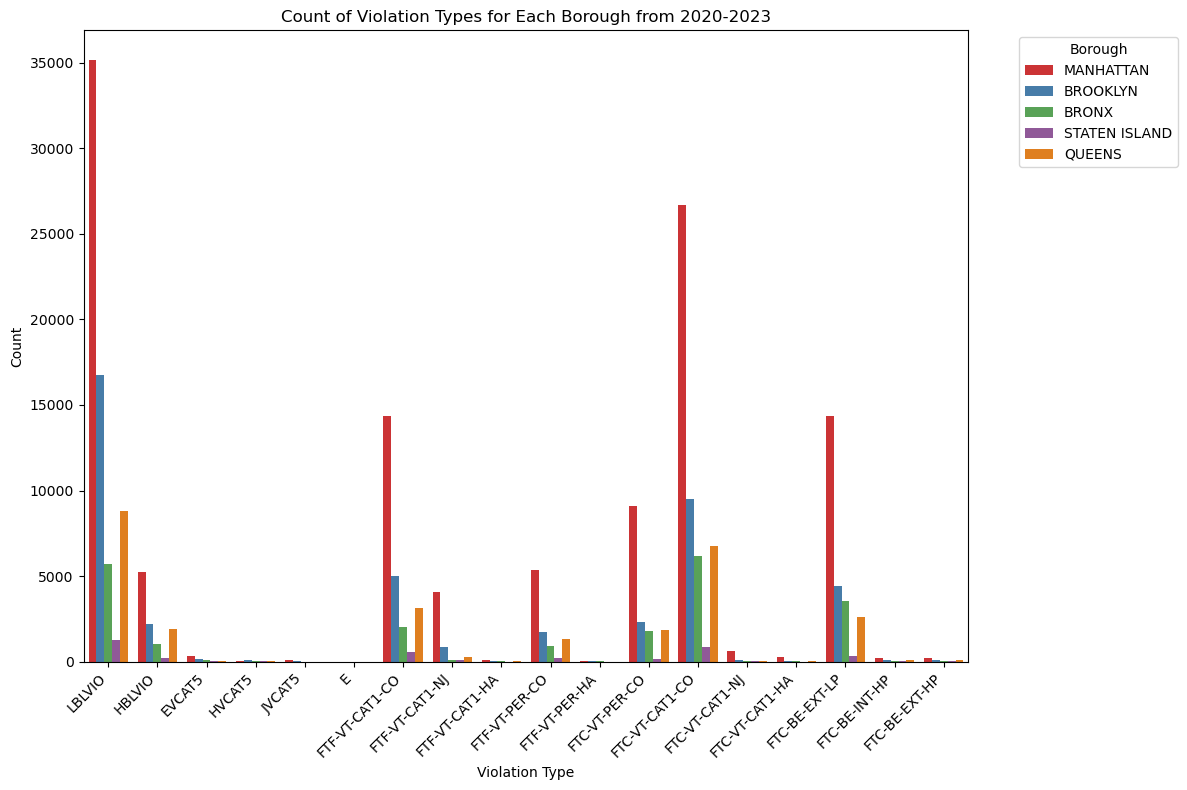

In [49]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Violation Type', hue='Borough', data=DF2,palette='Set1')
plt.title('Count of Violation Types for Each Borough from 2020-2023')
plt.xlabel('Violation Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Creating a easier to understand visualization 

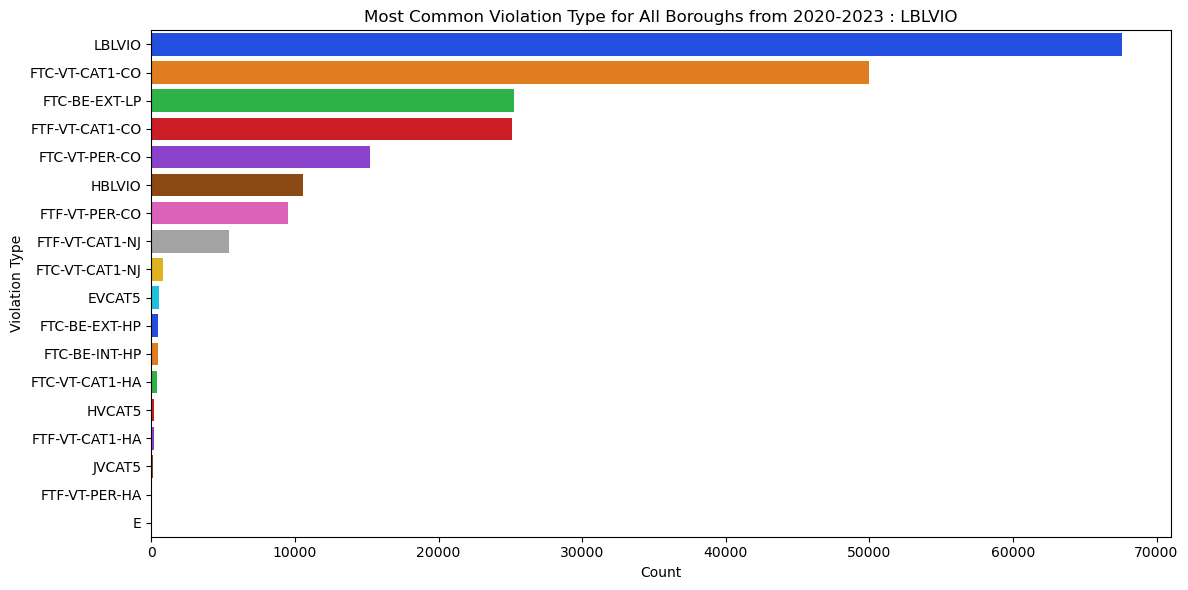

In [46]:
most_common_violation_type = DF2['Violation Type'].mode().iloc[0]


plt.figure(figsize=(12, 6))
sns.countplot(y='Violation Type', data=DF2, order=DF2['Violation Type'].value_counts().index, palette='bright')
plt.title(f'Most Common Violation Type for All Boroughs from 2020-2023 : {most_common_violation_type}')
plt.xlabel('Count')
plt.ylabel('Violation Type')
plt.tight_layout()
plt.show()

Most Common Violation Type: LBLVIO

After analyzing the data, the most common violation was LBLVIO. This is a violation involving boilers with low pressure.
Although this problem is not dangerous and can be fixed easily. Boiler systems must maintain the correct level of pressure to function correctly and safely. If the pressure drops too low, it can lead to several issues including:
Inadequate hot water supply, Ineffective central heating system, Noisy operation, Increased energy bills and Potential for damage to the heating system

Other insights I discovered:

* Manhattan had extraordinarily more violations for LBVIO compared to other boroughs

* Manhattan also had the greatest number of violations for the following types: 


LBLVIO = Low Pressure Boiler Violation (boiler)

FTC-VT-CAT1-CO = Violations Issued Failure to file CAT 1 Test Affirmation of Correction (Elevator)

FTC-BE-EXT-LP = Violation issued failure to file External Inspection Affirmations of correction for LP Devices (Boiler)

FTF-VT-CAT1-CO = Violation issued Failure to file CAT1 Test Report (Elevator)

FTC-VT-PER-CO = Violation Issued Failure To File Periodic Inspection Affirmation of Correction (Elevator)

* In comparison Staten Island had the least number of violations for all types. This is    probably because there are more houses than buildings in Staten Island

Lastly, it seems buildings are having a lot of issues relating to Elevator Inspection/Reporting which can be very dangerous to tenants if not corrected immediately.

Questions to ask:

What can we do to minimize these violations from occurring?


